# Import Data

In [1]:
import warnings; warnings.simplefilter('ignore')
try:
    import google.colab
    IN_COLAB = True
    !mkdir data models images
    !wget -P data/ https://raw.githubusercontent.com/nayorans/KodingData-DataScience-Bootcamp/refs/heads/main/es_teler_sales_10000.csv
    !pip install darts nolds tsfresh seaborn ipywidgets utils --q
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2025-09-27 05:29:17--  https://raw.githubusercontent.com/nayorans/KodingData-DataScience-Bootcamp/refs/heads/main/es_teler_sales_10000.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1674514 (1.6M) [text/plain]
Saving to: ‘data/es_teler_sales_10000.csv’

es_teler_sales_1000 100%[===================>]   1.60M  5.62MB/s    in 0.3s    

2025-09-27 05:29:18 (5.62 MB/s) - ‘data/es_teler_sales_10000.csv’ saved [1674514/1674514]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 898.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 M

In [2]:
import pandas as pd

df = pd.read_csv('data/es_teler_sales_10000.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             10000 non-null  object 
 1   transaction_datetime       10000 non-null  object 
 2   date                       10000 non-null  object 
 3   year                       10000 non-null  int64  
 4   month                      10000 non-null  int64  
 5   day                        10000 non-null  int64  
 6   dow                        10000 non-null  object 
 7   is_weekend                 10000 non-null  bool   
 8   city                       10000 non-null  object 
 9   store_id                   10000 non-null  object 
 10  channel                    10000 non-null  object 
 11  size                       10000 non-null  object 
 12  variant                    10000 non-null  object 
 13  topping                    4202 non-null   obje

In [3]:
df.head(5)

,transaction_id,transaction_datetime,date,year,month,day,dow,is_weekend,city,store_id,...,weather,temperature_c,quantity,list_price_idr,promo_code,discount_pct,unit_price_after_discount,delivery_fee_idr,gross_revenue_idr,rating
0,TX002944,2024-01-01 09:24:16,2024-01-01,2024,1,1,Monday,False,Jakarta,JKT-08,...,Rain,30.5,1,26200.0,NaN,0.0,26200.0,0,26200.0,NaN
1,TX007461,2024-01-01 10:14:33,2024-01-01,2024,1,1,Monday,False,Bandung,BDG-05,...,Cloudy,26.4,3,18000.0,PAYDAY20,0.2,14400.0,0,43200.0,4.0
2,TX001373,2024-01-01 11:51:55,2024-01-01,2024,1,1,Monday,False,Surabaya,SBY-01,...,Sunny,34.3,1,29900.0,PAYDAY20,0.2,23900.0,0,23900.0,NaN
3,TX007690,2024-01-01 11:52:26,2024-01-01,2024,1,1,Monday,False,Medan,MDN-03,...,Sunny,32.8,2,26400.0,NaN,0.0,26400.0,0,52800.0,4.0
4,TX006196,2024-01-01 12:24:58,2024-01-01,2024,1,1,Monday,False,Jakarta,JKT-07,...,Cloudy,28.7,1,22900.0,NaN,0.0,22900.0,0,22900.0,3.9


# Penanganan Missing Value

In [4]:
df.isnull().sum()

,0
transaction_id,0
transaction_datetime,0
date,0
year,0
month,0
day,0
dow,0
is_weekend,0
city,0
store_id,0


In [5]:
df['topping'].unique()

array([nan, 'ExtraJackfruit', 'ExtraAvocado', 'ExtraCoconut',
       'CheeseFoam'], dtype=object)

In [6]:
df['topping'] = df['topping'].fillna('Without Topping')
df['topping'].unique()

array(['Without Topping', 'ExtraJackfruit', 'ExtraAvocado',
       'ExtraCoconut', 'CheeseFoam'], dtype=object)

In [7]:
df['promo_code'].unique()

array([nan, 'PAYDAY20', 'RAINY15', 'APP5', 'B2G1', 'WEEKEND10'],
      dtype=object)

In [8]:
df['promo_code'] = df['promo_code'].fillna('No Promo Code')
df['promo_code'].unique()

array(['No Promo Code', 'PAYDAY20', 'RAINY15', 'APP5', 'B2G1',
       'WEEKEND10'], dtype=object)

In [9]:
mean_rating = df['rating'].mean()
df['rating'] = df['rating'].fillna(mean_rating)

In [10]:
df.isnull().sum()

,0
transaction_id,0
transaction_datetime,0
date,0
year,0
month,0
day,0
dow,0
is_weekend,0
city,0
store_id,0


# EDA

In [11]:
df.describe()

,year,month,day,temperature_c,quantity,list_price_idr,discount_pct,unit_price_after_discount,delivery_fee_idr,gross_revenue_idr,rating
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2024.394200,5.683100,15.595300,30.666860,1.574000,26140.630000,0.035501,25212.400000,3615.000000,43173.240000,4.346807
std,0.488703,3.212555,8.792158,3.862024,0.897778,4254.635636,0.070804,4510.290513,4991.699781,24788.763668,0.316049
min,2024.000000,1.000000,1.000000,16.800000,1.000000,18000.000000,0.000000,12100.000000,0.000000,14400.000000,2.500000
25%,2024.000000,3.000000,8.000000,28.500000,1.000000,23100.000000,0.000000,22400.000000,0.000000,26200.000000,4.346807
50%,2024.000000,5.000000,16.000000,31.200000,1.000000,26200.000000,0.000000,25200.000000,0.000000,34300.000000,4.346807
75%,2025.000000,8.000000,23.000000,33.400000,2.000000,28800.000000,0.000000,28000.000000,10000.000000,54600.000000,4.346807
max,2025.000000,12.000000,31.000000,43.400000,8.000000,41600.000000,0.330000,41600.000000,14000.000000,228000.000000,5.000000


In [12]:
columns_to_check = ['city', 'channel', 'store_id', 'size', 'variant', 'topping', 'payment_method', 'weather', 'promo_code']

for col in columns_to_check:
    print(f"Unique values in '{col}' column:")
    print(df[col].unique())
    print("-" * 20)

Unique values in 'city' column:
['Jakarta' 'Bandung' 'Surabaya' 'Medan' 'Denpasar']
--------------------
Unique values in 'channel' column:
['Takeaway' 'Dine-in' 'Online-App' 'Delivery']
--------------------
Unique values in 'store_id' column:
['JKT-08' 'BDG-05' 'SBY-01' 'MDN-03' 'JKT-07' 'JKT-02' 'DPS-02' 'BDG-04'
 'JKT-04' 'MDN-01' 'SBY-04' 'JKT-10' 'DPS-03' 'SBY-03' 'JKT-06' 'BDG-03'
 'JKT-09' 'DPS-01' 'MDN-02' 'JKT-05' 'BDG-02' 'JKT-03' 'SBY-06' 'SBY-02'
 'JKT-01' 'SBY-05' 'BDG-01']
--------------------
Unique values in 'size' column:
['Regular' 'Small' 'Large']
--------------------
Unique values in 'variant' column:
['Special' 'Original' 'LessSugar' 'Durian']
--------------------
Unique values in 'topping' column:
['Without Topping' 'ExtraJackfruit' 'ExtraAvocado' 'ExtraCoconut'
 'CheeseFoam']
--------------------
Unique values in 'payment_method' column:
['OVO' 'QRIS' 'Debit' 'Cash' 'ShopeePay' 'GoPay' 'Credit']
--------------------
Unique values in 'weather' column:
['Rain' 'Clo

In [13]:
df.head(10)

,transaction_id,transaction_datetime,date,year,month,day,dow,is_weekend,city,store_id,...,weather,temperature_c,quantity,list_price_idr,promo_code,discount_pct,unit_price_after_discount,delivery_fee_idr,gross_revenue_idr,rating
0,TX002944,2024-01-01 09:24:16,2024-01-01,2024,1,1,Monday,False,Jakarta,JKT-08,...,Rain,30.5,1,26200.0,No Promo Code,0.00,26200.0,0,26200.0,4.346807
1,TX007461,2024-01-01 10:14:33,2024-01-01,2024,1,1,Monday,False,Bandung,BDG-05,...,Cloudy,26.4,3,18000.0,PAYDAY20,0.20,14400.0,0,43200.0,4.000000
2,TX001373,2024-01-01 11:51:55,2024-01-01,2024,1,1,Monday,False,Surabaya,SBY-01,...,Sunny,34.3,1,29900.0,PAYDAY20,0.20,23900.0,0,23900.0,4.346807
3,TX007690,2024-01-01 11:52:26,2024-01-01,2024,1,1,Monday,False,Medan,MDN-03,...,Sunny,32.8,2,26400.0,No Promo Code,0.00,26400.0,0,52800.0,4.000000
4,TX006196,2024-01-01 12:24:58,2024-01-01,2024,1,1,Monday,False,Jakarta,JKT-07,...,Cloudy,28.7,1,22900.0,No Promo Code,0.00,22900.0,0,22900.0,3.900000
5,TX003465,2024-01-01 12:55:19,2024-01-01,2024,1,1,Monday,False,Jakarta,JKT-02,...,Rain,30.3,1,28100.0,RAINY15,0.15,23900.0,0,23900.0,4.346807
6,TX000977,2024-01-01 13:56:38,2024-01-01,2024,1,1,Monday,False,Denpasar,DPS-02,...,Sunny,31.9,1,36300.0,No Promo Code,0.00,36300.0,0,36300.0,3.800000
7,TX008352,2024-01-01 15:32:02,2024-01-01,2024,1,1,Monday,False,Bandung,BDG-04,...,Rain,26.1,4,26000.0,No Promo Code,0.00,26000.0,0,104000.0,4.346807
8,TX000611,2024-01-01 16:16:15,2024-01-01,2024,1,1,Monday,False,Jakarta,JKT-04,...,Cloudy,33.5,1,23100.0,PAYDAY20,0.20,18500.0,0,18500.0,4.300000
9,TX006881,2024-01-01 16:36:23,2024-01-01,2024,1,1,Monday,False,Medan,MDN-01,...,Rain,29.8,1,22400.0,No Promo Code,0.00,22400.0,8000,30400.0,4.346807


# Visualisasi Data

## Pie Chart

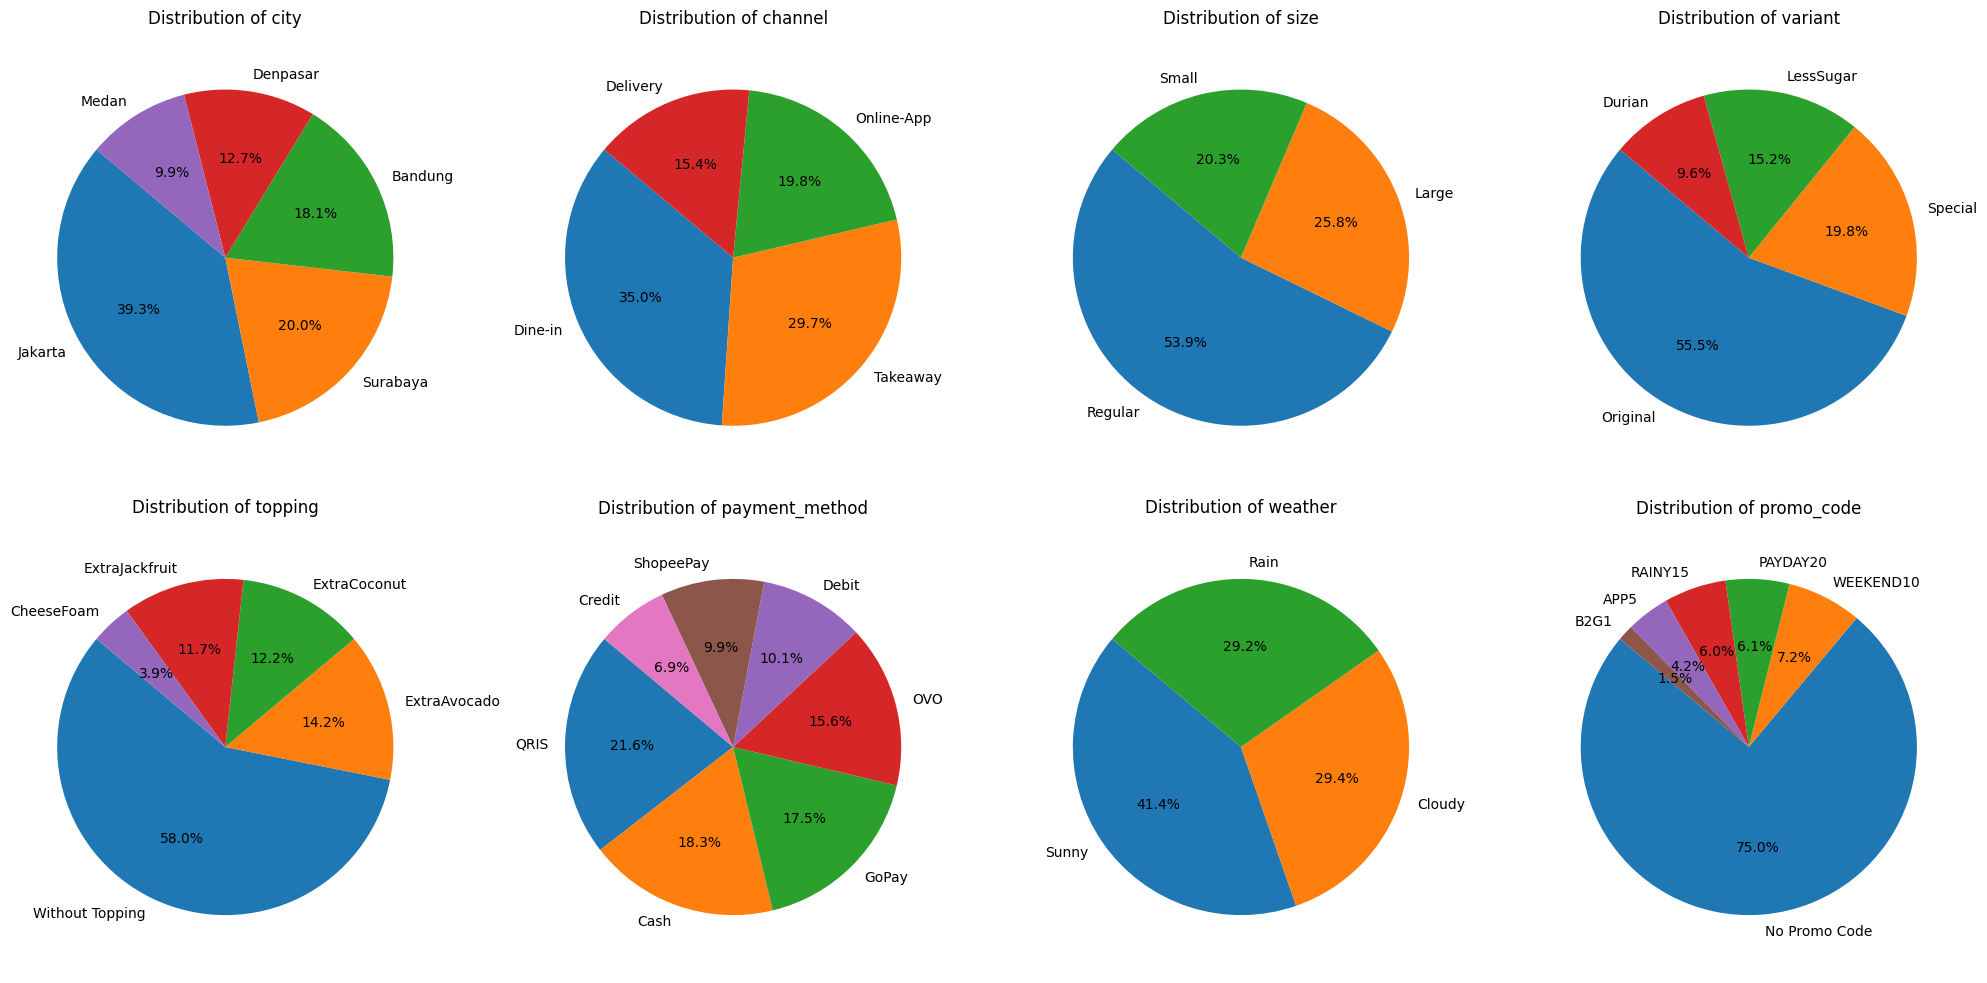

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

object_column = ['city', 'channel', 'size', 'variant', 'topping', 'payment_method', 'weather', 'promo_code']

# Determine the number of rows and columns for the subplot grid
n_cols = 4
n_rows = (len(object_column) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(object_column):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].axis('equal')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Bar Chart

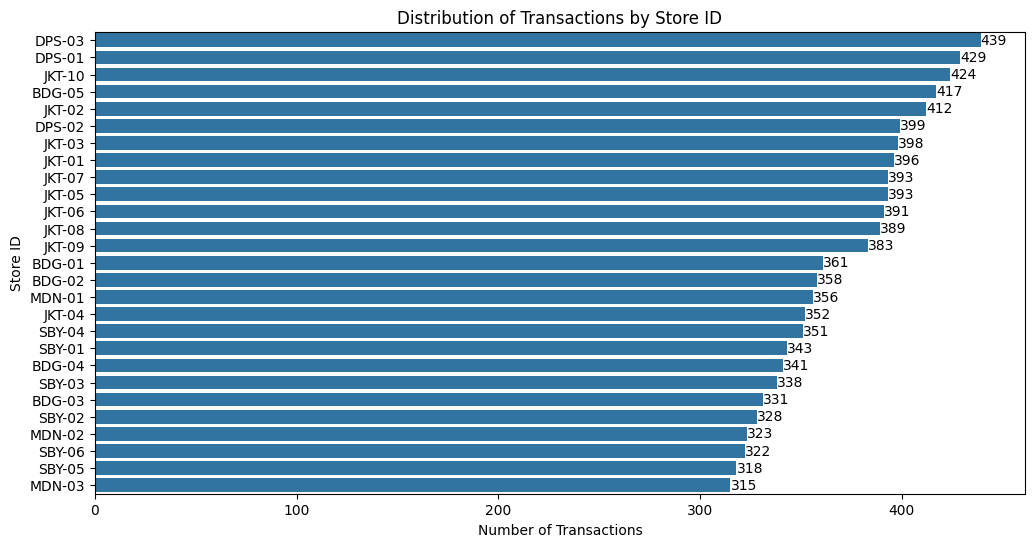

In [15]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, y='store_id', order=df['store_id'].value_counts().index)
plt.title('Distribution of Transactions by Store ID')
plt.xlabel('Number of Transactions')
plt.ylabel('Store ID')

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()

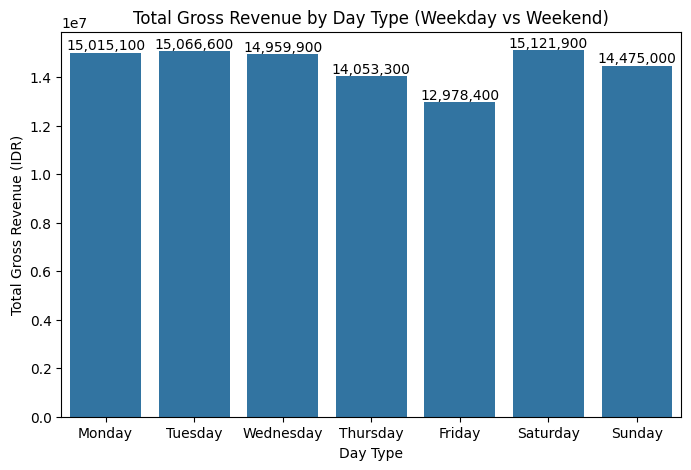

In [16]:
sales_by_day_type = df.groupby('day')['gross_revenue_idr'].sum().reset_index()

# Map boolean to readable labels
sales_by_day_type['day'] = sales_by_day_type['day'].map({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'})

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=sales_by_day_type, x='day', y='gross_revenue_idr')
plt.title('Total Gross Revenue by Day Type (Weekday vs Weekend)')
plt.xlabel('Day Type')
plt.ylabel('Total Gross Revenue (IDR)')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()

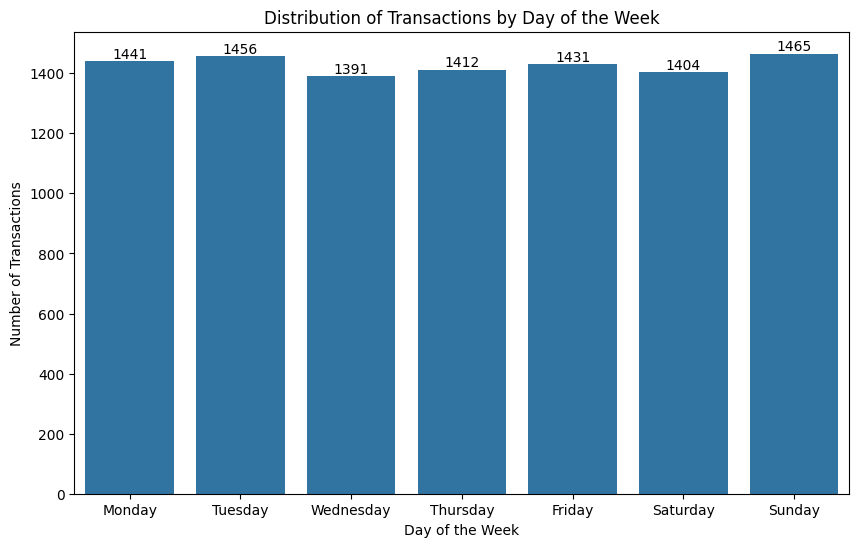

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='dow', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()

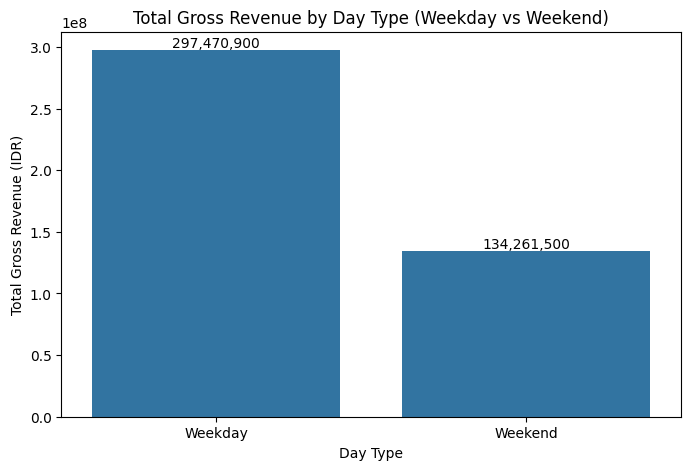

In [18]:
sales_by_day_type = df.groupby('is_weekend')['gross_revenue_idr'].sum().reset_index()

# Map boolean to readable labels
sales_by_day_type['is_weekend'] = sales_by_day_type['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=sales_by_day_type, x='is_weekend', y='gross_revenue_idr')
plt.title('Total Gross Revenue by Day Type (Weekday vs Weekend)')
plt.xlabel('Day Type')
plt.ylabel('Total Gross Revenue (IDR)')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()

## Bar-line Chart

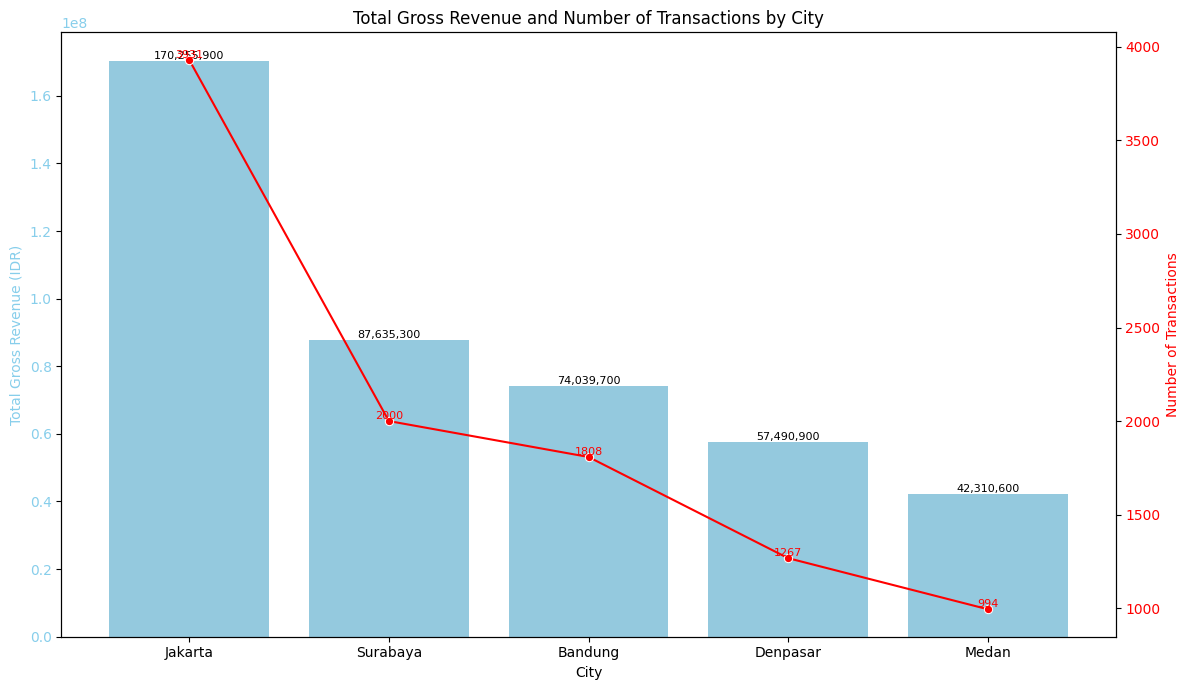

In [19]:
# Kelompokkan data berdasarkan kota dan hitung total gross revenue serta jumlah transaksi
city_sales_transactions = df.groupby('city').agg(
    total_gross_revenue=('gross_revenue_idr', 'sum'),
    number_of_transactions=('transaction_id', 'count')
).reset_index()

# Urutkan berdasarkan total gross revenue untuk visualisasi yang lebih baik
city_sales_transactions = city_sales_transactions.sort_values('total_gross_revenue', ascending=False)

# Buat bar-line chart
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot total gross revenue sebagai bar
sns.barplot(x='city', y='total_gross_revenue', data=city_sales_transactions, ax=ax1, color='skyblue')
ax1.set_xlabel('City')
ax1.set_ylabel('Total Gross Revenue (IDR)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Total Gross Revenue and Number of Transactions by City')

# Buat sumbu y kedua untuk jumlah transaksi (line plot)
ax2 = ax1.twinx()
sns.lineplot(x='city', y='number_of_transactions', data=city_sales_transactions, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Number of Transactions', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Tambahkan label data untuk bar (Total Gross Revenue)
for container in ax1.containers:
    ax1.bar_label(container, fmt='{:,.0f}', fontsize=8)

# Tambahkan label data untuk line (Number of Transactions)
for x, y in zip(city_sales_transactions['city'], city_sales_transactions['number_of_transactions']):
    ax2.text(x, y, f'{y}', color='red', ha='center', va='bottom', fontsize=8)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

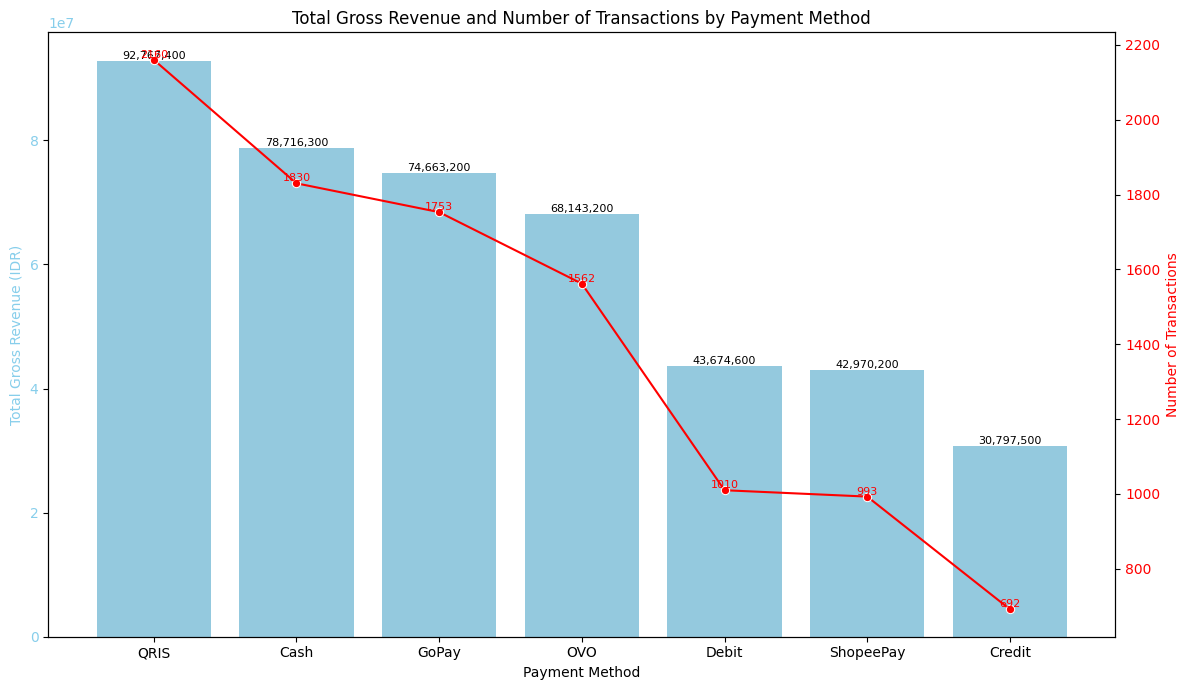

In [20]:
# Kelompokkan data berdasarkan metode pembayaran dan hitung total gross revenue serta jumlah transaksi
payment_method_analysis = df.groupby('payment_method').agg(
    total_gross_revenue=('gross_revenue_idr', 'sum'),
    number_of_transactions=('transaction_id', 'count')
).reset_index()

# Urutkan berdasarkan total gross revenue untuk visualisasi yang lebih baik
payment_method_analysis = payment_method_analysis.sort_values('total_gross_revenue', ascending=False)

# Buat bar-line chart
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot total gross revenue sebagai bar
sns.barplot(x='payment_method', y='total_gross_revenue', data=payment_method_analysis, ax=ax1, color='skyblue')
ax1.set_xlabel('Payment Method')
ax1.set_ylabel('Total Gross Revenue (IDR)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Total Gross Revenue and Number of Transactions by Payment Method')

# Buat sumbu y kedua untuk jumlah transaksi (line plot)
ax2 = ax1.twinx()
sns.lineplot(x='payment_method', y='number_of_transactions', data=payment_method_analysis, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Number of Transactions', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Tambahkan label data untuk bar (Total Gross Revenue)
for container in ax1.containers:
    ax1.bar_label(container, fmt='{:,.0f}', fontsize=8)

# Tambahkan label data untuk line (Number of Transactions)
for x, y in zip(payment_method_analysis['payment_method'], payment_method_analysis['number_of_transactions']):
    ax2.text(x, y, f'{y}', color='red', ha='center', va='bottom', fontsize=8)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Line Plot

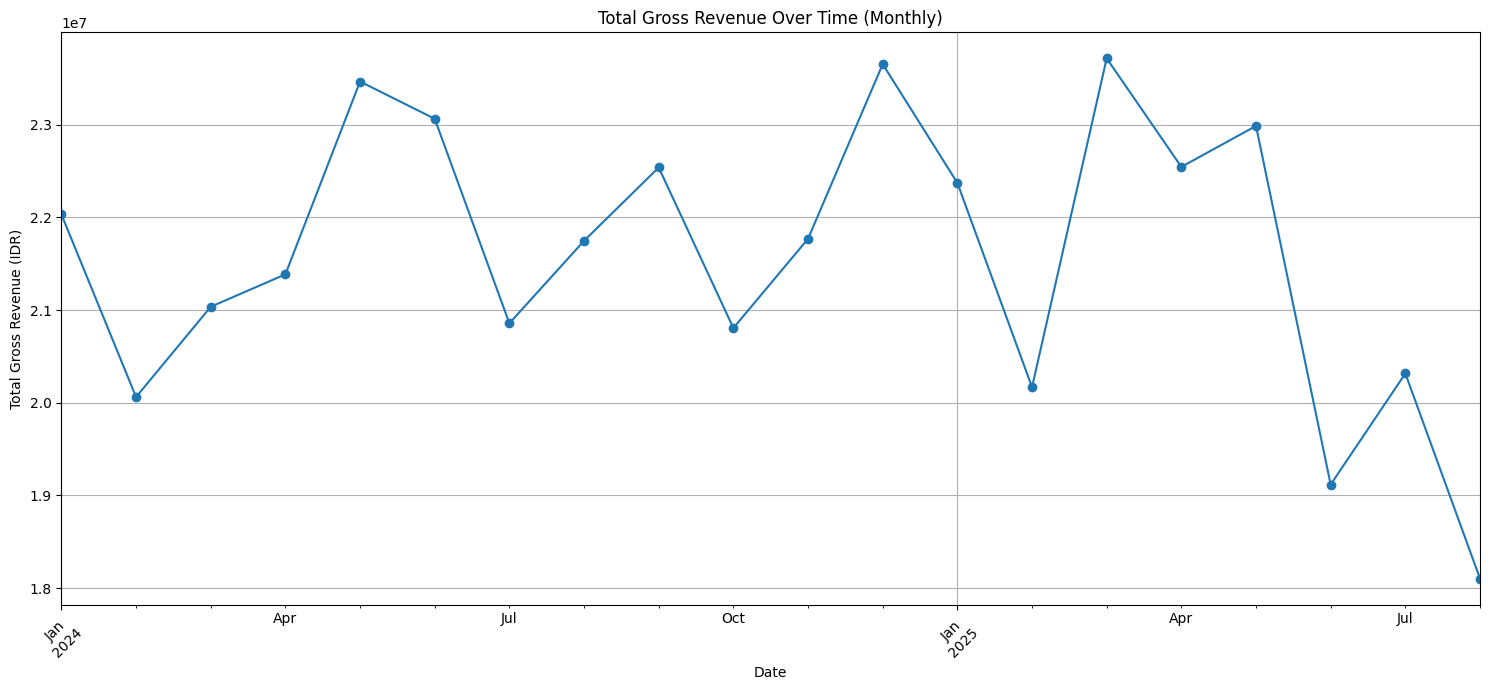

In [21]:
# Pastikan kolom 'date' bertipe datetime sebelum resampling
df['date'] = pd.to_datetime(df['date'])

# Agregasi data per bulan dan hitung total gross revenue
monthly_sales = df.set_index('date').resample('M')['gross_revenue_idr'].sum()

# Buat line chart
plt.figure(figsize=(15, 7))
monthly_sales.plot(marker='o', linestyle='-')

plt.title('Total Gross Revenue Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Gross Revenue (IDR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Stacked Bar Chart

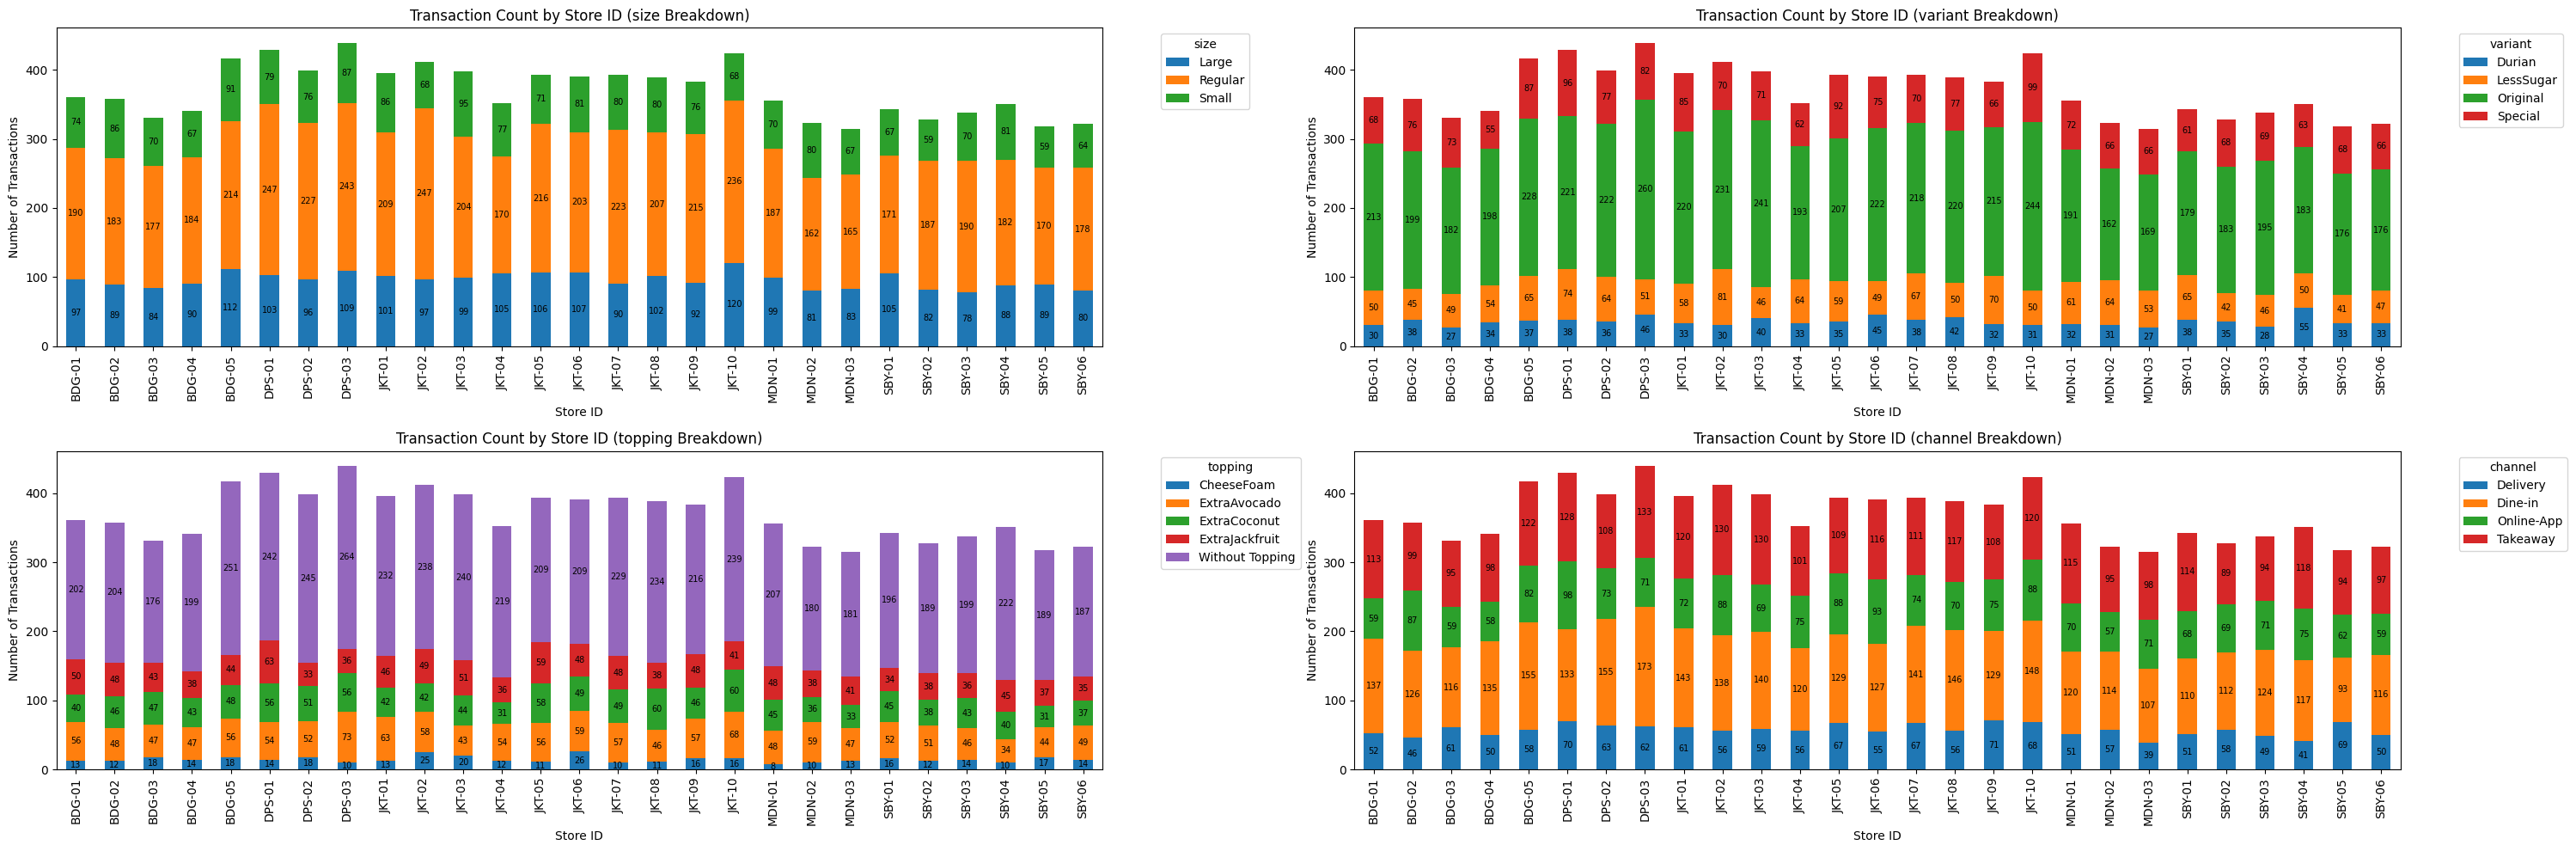

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns to break down by
breakdown_columns = ['size', 'variant', 'topping', 'channel']

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 10), sharey=False) # Use sharey=False as transaction counts might differ

# Flatten the axes array if it's 2D
if n_rows > 1:
    axes = axes.flatten()

for i, col in enumerate(breakdown_columns):
    # Group data by store_id and the breakdown column, and count transactions
    transaction_counts = df.groupby(['store_id', col]).size().unstack(fill_value=0)

    # Plot stacked bar chart on the corresponding subplot
    ax = transaction_counts.plot(kind='bar', stacked=True, ax=axes[i], legend=True)
    axes[i].set_title(f'Transaction Count by Store ID ({col} Breakdown)')
    axes[i].set_xlabel('Store ID')
    axes[i].set_ylabel('Number of Transactions')
    axes[i].tick_params(axis='x', rotation=90) # Rotate x-axis labels for readability
    axes[i].legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add data labels manually by iterating through patches
    for bars in ax.containers:
      for bar in bars:
        height = bar.get_height()
        if height > 0: # Only label bars with height > 0
            ax.text(bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2.,
                    f'{int(height)}',
                    ha='center', va='center', fontsize=7, color='black')


plt.tight_layout()
plt.show()

## Pair Plot

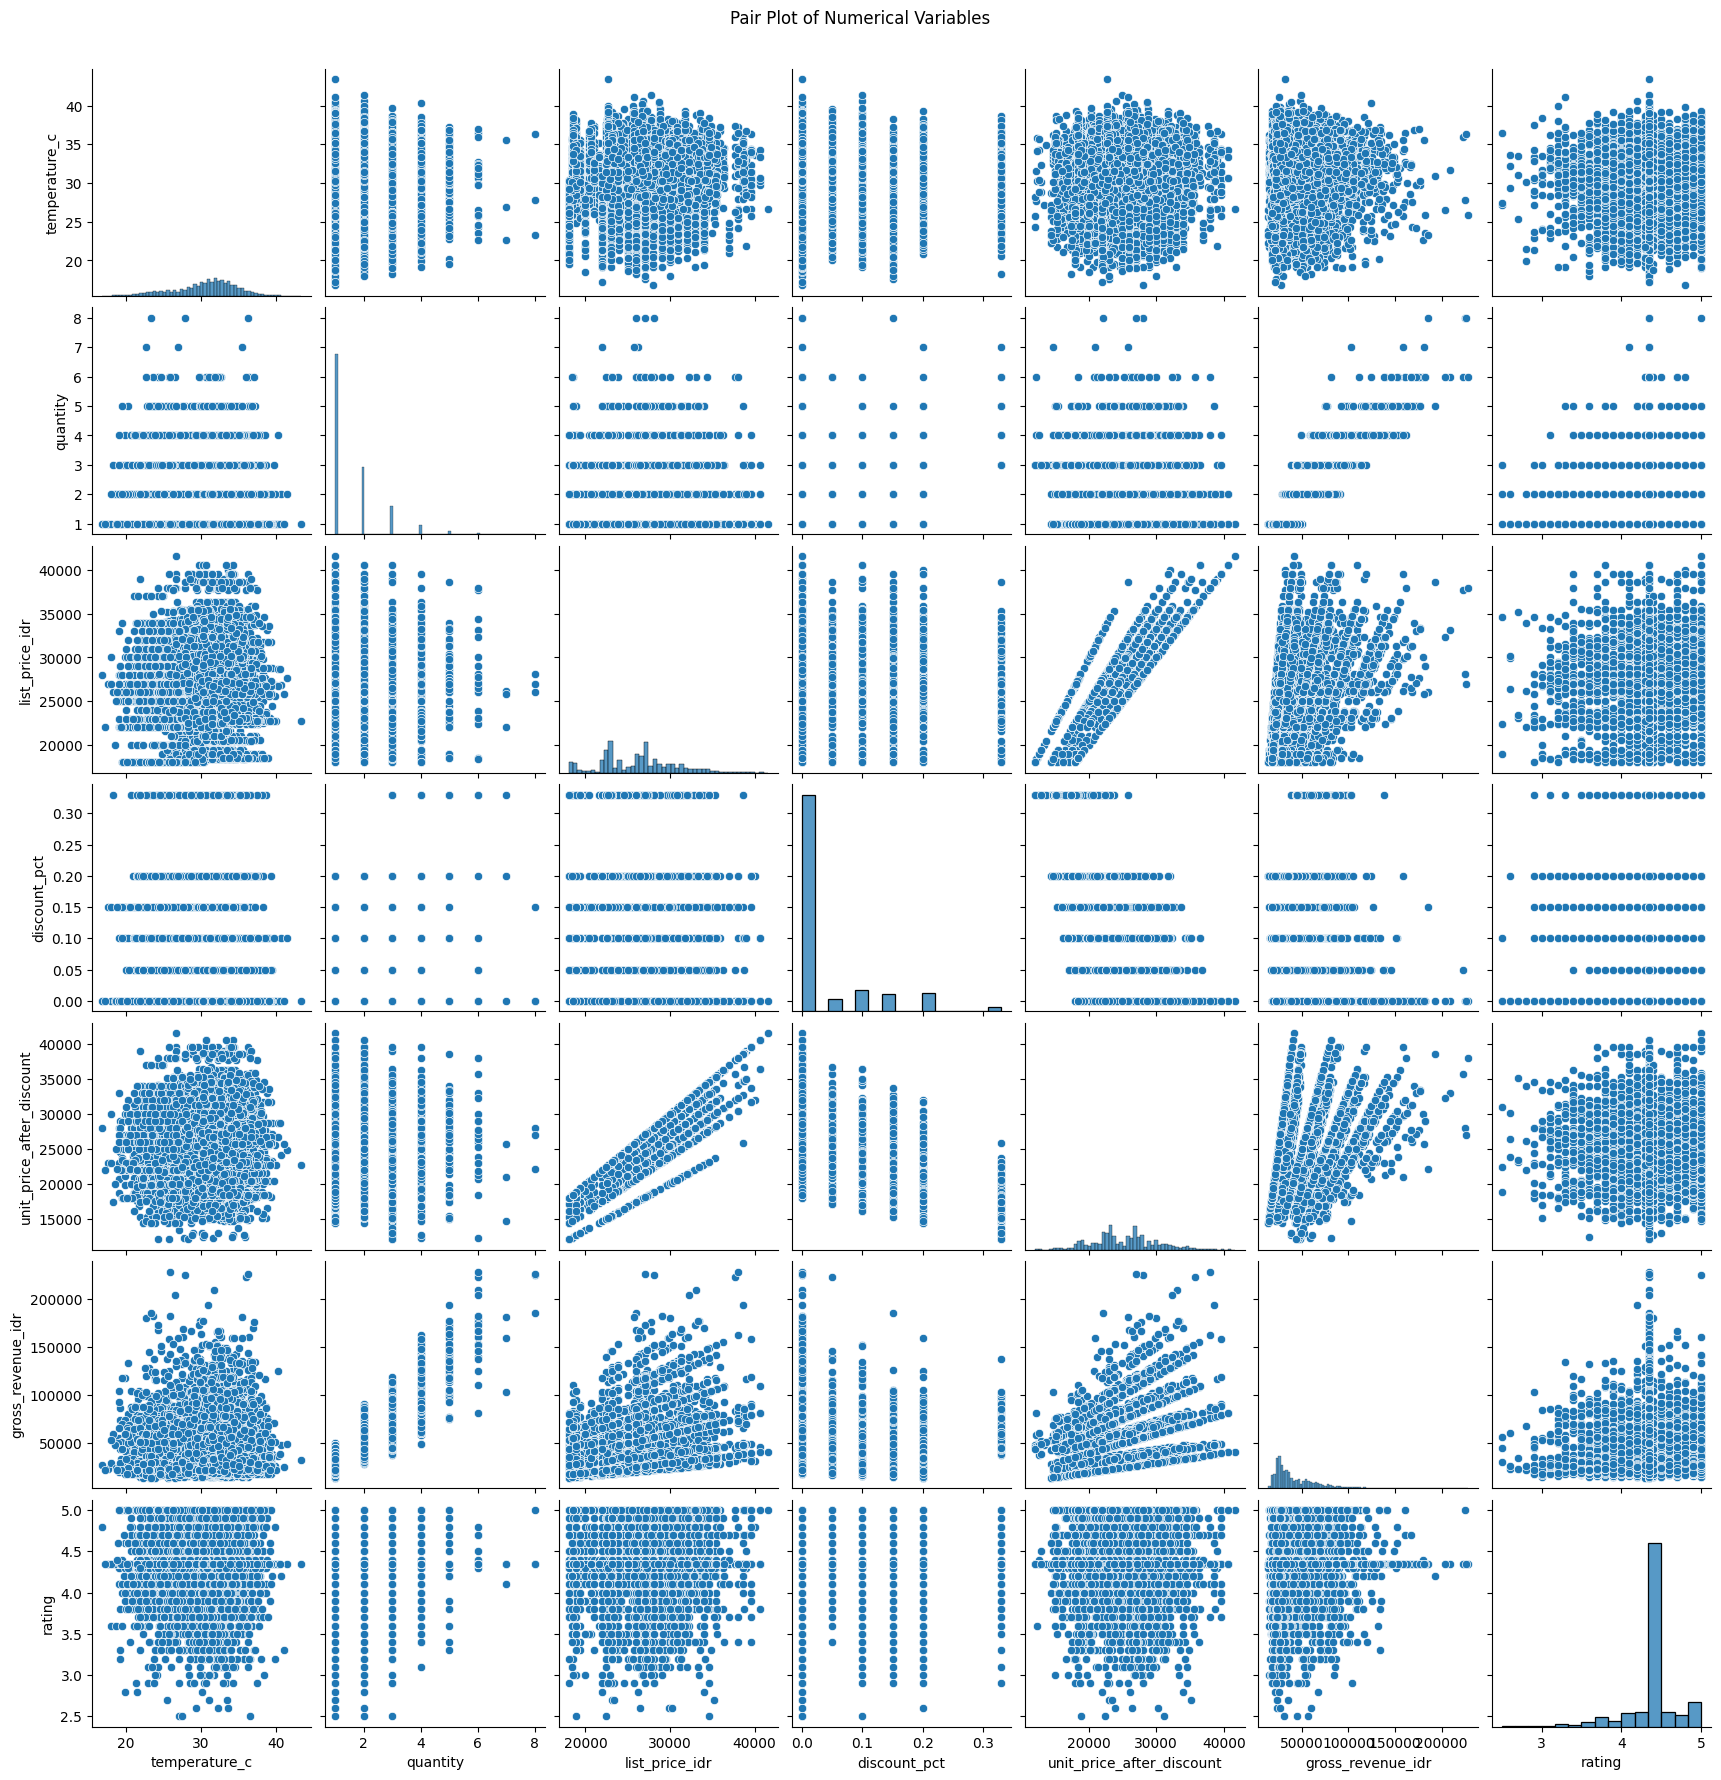

In [23]:
# Pilih kolom numerik yang relevan untuk pair plot
# Mengeluarkan 'year', 'month', 'day' karena lebih ke kategori waktu, dan 'delivery_fee_idr' karena mungkin banyak 0
numerical_cols = ['temperature_c', 'quantity', 'list_price_idr',
                  'discount_pct', 'unit_price_after_discount',
                  'gross_revenue_idr', 'rating']

# Buat pair plot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02) # Add a title to the plot
plt.show()

## Box Plot

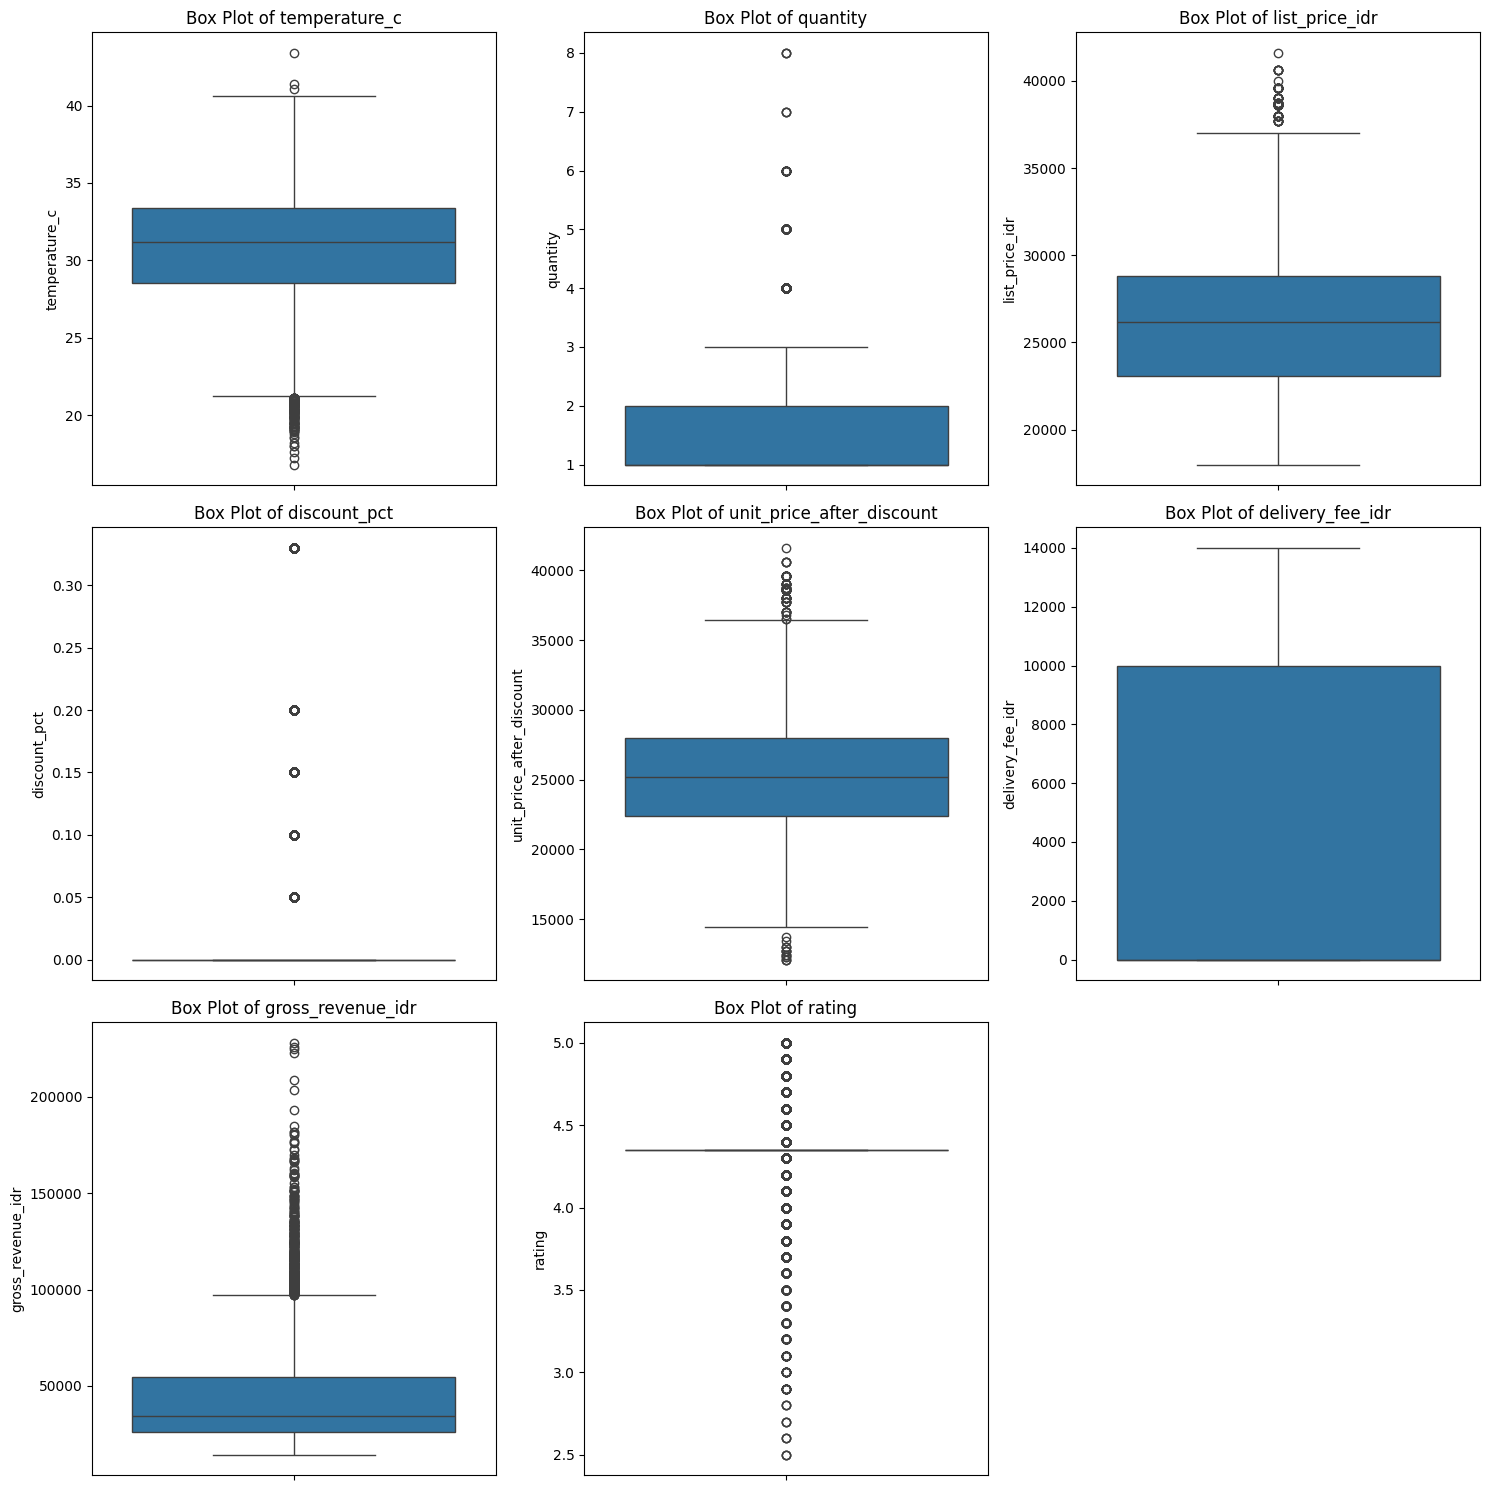

In [24]:
# Pilih kolom numerik yang ingin divisualisasikan dengan box plot
# Mengeluarkan kolom ID atau yang tidak relevan untuk analisis distribusi outlier
numerical_cols_for_boxplot = ['temperature_c', 'quantity', 'list_price_idr',
                              'discount_pct', 'unit_price_after_discount',
                              'delivery_fee_idr', 'gross_revenue_idr', 'rating']

# Tentukan jumlah baris dan kolom untuk subplot grid
n_cols = 3 # Misalnya 3 kolom per baris
n_rows = (len(numerical_cols_for_boxplot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Buat box plot untuk setiap kolom numerik
for i, col in enumerate(numerical_cols_for_boxplot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

# Sembunyikan subplot yang tidak terpakai jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Histogram

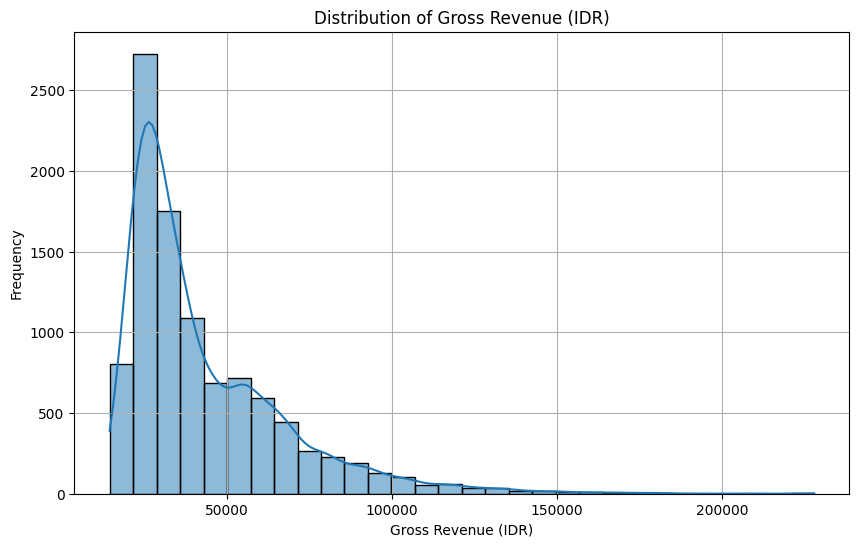

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='gross_revenue_idr', bins=30, kde=True) # bins can be adjusted, kde=True adds a density curve
plt.title('Distribution of Gross Revenue (IDR)')
plt.xlabel('Gross Revenue (IDR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

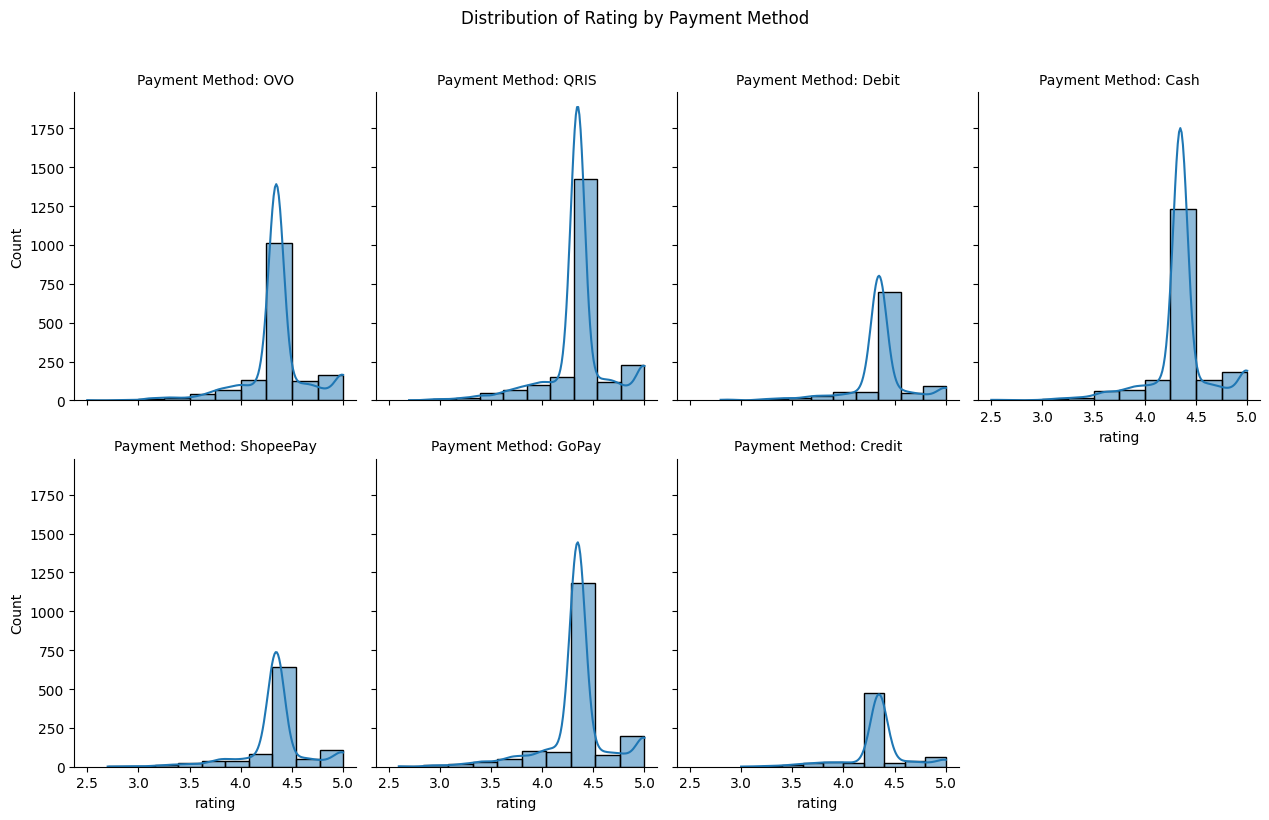

In [26]:
# Buat FacetGrid berdasarkan payment_method
g = sns.FacetGrid(df, col='payment_method', col_wrap=4, height=4, aspect=0.8) # col_wrap to control number of columns

# Petakan histogram rating pada setiap facet
g.map(sns.histplot, 'rating', bins=10, kde=True) # bins can be adjusted, kde=True adds density curve

# Tambahkan judul untuk setiap subplot
g.set_titles("Payment Method: {col_name}")

# Tambahkan judul utama
plt.suptitle('Distribution of Rating by Payment Method', y=1.02)

plt.tight_layout()
plt.show()

## Facet Grid

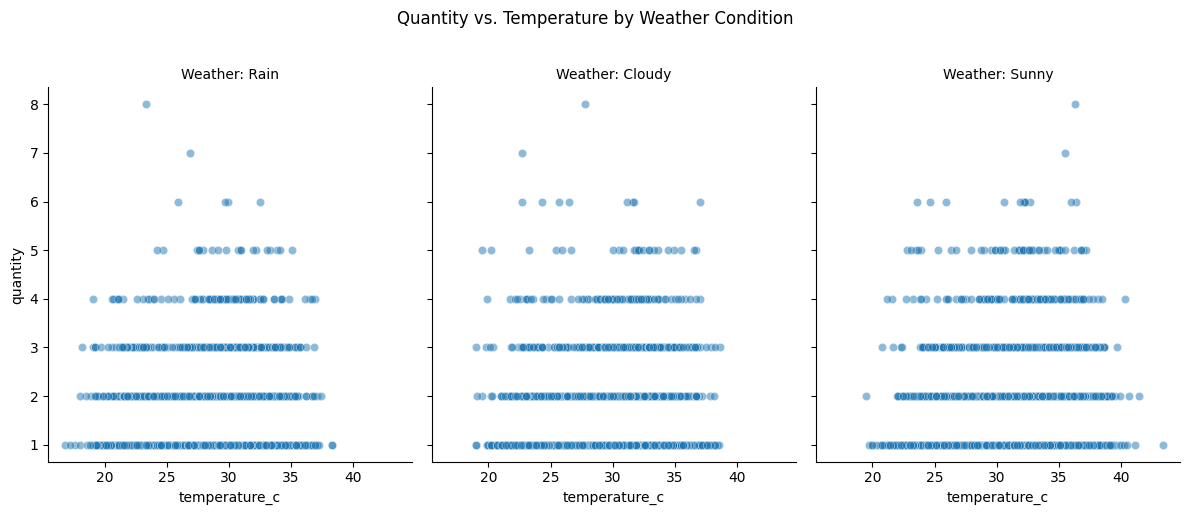

In [27]:
# Buat FacetGrid
g = sns.FacetGrid(df, col='weather', height=5, aspect=0.8)

# Petakan scatter plot pada setiap facet
g.map(sns.scatterplot, 'temperature_c', 'quantity', alpha=0.5)

# Tambahkan judul untuk setiap subplot
g.set_titles("Weather: {col_name}")

# Tambahkan judul utama
plt.suptitle('Quantity vs. Temperature by Weather Condition', y=1.02)

plt.tight_layout()
plt.show()

# Store Scoreboard

### Data preprocessing

### Subtask:
Ensure the date column is in datetime format and extract the week number and year.


In [28]:
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.isocalendar().week.astype(int)
df['year'] = df['date'].dt.isocalendar().year.astype(int)
df.head()

,transaction_id,transaction_datetime,date,year,month,day,dow,is_weekend,city,store_id,...,temperature_c,quantity,list_price_idr,promo_code,discount_pct,unit_price_after_discount,delivery_fee_idr,gross_revenue_idr,rating,week
0,TX002944,2024-01-01 09:24:16,2024-01-01,2024,1,1,Monday,False,Jakarta,JKT-08,...,30.5,1,26200.0,No Promo Code,0.0,26200.0,0,26200.0,4.346807,1
1,TX007461,2024-01-01 10:14:33,2024-01-01,2024,1,1,Monday,False,Bandung,BDG-05,...,26.4,3,18000.0,PAYDAY20,0.2,14400.0,0,43200.0,4.000000,1
2,TX001373,2024-01-01 11:51:55,2024-01-01,2024,1,1,Monday,False,Surabaya,SBY-01,...,34.3,1,29900.0,PAYDAY20,0.2,23900.0,0,23900.0,4.346807,1
3,TX007690,2024-01-01 11:52:26,2024-01-01,2024,1,1,Monday,False,Medan,MDN-03,...,32.8,2,26400.0,No Promo Code,0.0,26400.0,0,52800.0,4.000000,1
4,TX006196,2024-01-01 12:24:58,2024-01-01,2024,1,1,Monday,False,Jakarta,JKT-07,...,28.7,1,22900.0,No Promo Code,0.0,22900.0,0,22900.0,3.900000,1


### Aggregate data weekly and by city

### Subtask:
Group the data by city, year, and week to calculate weekly KPIs.


In [29]:
weekly_kpis = df.groupby(['city', 'year', 'week']).agg(
    total_gross_revenue=('gross_revenue_idr', 'sum'),
    number_of_transactions=('transaction_id', 'count'),
    promo_code_counts=('promo_code', lambda x: x.value_counts().to_dict()),
    channel_counts=('channel', lambda x: x.value_counts().to_dict()),
    variant_counts=('variant', lambda x: x.value_counts().to_dict()),
    weather_counts=('weather', lambda x: x.value_counts().to_dict())
).reset_index()

display(weekly_kpis.head())

,city,year,week,total_gross_revenue,number_of_transactions,promo_code_counts,channel_counts,variant_counts,weather_counts
0,Bandung,2024,1,829800.0,17,"{'No Promo Code': 12, 'RAINY15': 3, 'PAYDAY20'...","{'Takeaway': 6, 'Dine-in': 6, 'Online-App': 4,...","{'Original': 11, 'Durian': 3, 'Special': 2, 'L...","{'Rain': 11, 'Cloudy': 4, 'Sunny': 2}"
1,Bandung,2024,2,880600.0,20,"{'No Promo Code': 17, 'RAINY15': 2, 'APP5': 1}","{'Dine-in': 8, 'Takeaway': 5, 'Delivery': 4, '...","{'Original': 13, 'LessSugar': 3, 'Durian': 2, ...","{'Rain': 10, 'Sunny': 9, 'Cloudy': 1}"
2,Bandung,2024,3,1003100.0,25,"{'No Promo Code': 19, 'WEEKEND10': 3, 'RAINY15...","{'Online-App': 8, 'Dine-in': 8, 'Takeaway': 6,...","{'Original': 16, 'Special': 4, 'LessSugar': 3,...","{'Rain': 12, 'Cloudy': 11, 'Sunny': 2}"
3,Bandung,2024,4,796600.0,29,"{'No Promo Code': 16, 'WEEKEND10': 5, 'RAINY15...","{'Dine-in': 14, 'Takeaway': 10, 'Online-App': ...","{'Original': 17, 'Special': 5, 'LessSugar': 4,...","{'Rain': 18, 'Cloudy': 9, 'Sunny': 2}"
4,Bandung,2024,5,1183000.0,28,"{'No Promo Code': 19, 'PAYDAY20': 4, 'RAINY15'...","{'Online-App': 9, 'Dine-in': 7, 'Takeaway': 7,...","{'Original': 14, 'LessSugar': 6, 'Special': 6,...","{'Sunny': 12, 'Rain': 11, 'Cloudy': 5}"


### Calculate weekly kpis

### Subtask:
Calculate weekly KPIs including Revenue, Orders, AOV, Promo Rate, Mix Channel, Top Variant, and Weather for each city and week.


In [30]:
# Calculate AOV
weekly_kpis['AOV'] = weekly_kpis['total_gross_revenue'] / weekly_kpis['number_of_transactions']

# Calculate Promo Rate
# Use .get(key, 0) to handle cases where 'No Promo Code' might not exist in the dictionary
weekly_kpis['Promo_Rate'] = weekly_kpis.apply(
    lambda row: ((row['number_of_transactions'] - row['promo_code_counts'].get('No Promo Code', 0)) / row['number_of_transactions']) * 100 if row['number_of_transactions'] > 0 else 0,
    axis=1
)

# Calculate Mix Channel (as a dictionary or formatted string)
weekly_kpis['Mix_Channel'] = weekly_kpis['channel_counts'].apply(
    lambda counts: {k: v / sum(counts.values()) for k, v in counts.items()} if sum(counts.values()) > 0 else {}
)

# Determine Top Variant
weekly_kpis['Top_Variant'] = weekly_kpis['variant_counts'].apply(
    lambda counts: max(counts, key=counts.get) if counts else None
)

# Determine Weather
weekly_kpis['Weather'] = weekly_kpis['weather_counts'].apply(
    lambda counts: max(counts, key=counts.get) if counts else None
)

# Drop intermediate count columns
weekly_kpis = weekly_kpis.drop(columns=['promo_code_counts', 'channel_counts', 'variant_counts', 'weather_counts'])

# Display the first few rows
display(weekly_kpis.head())

,city,year,week,total_gross_revenue,number_of_transactions,AOV,Promo_Rate,Mix_Channel,Top_Variant,Weather
0,Bandung,2024,1,829800.0,17,48811.764706,29.411765,"{'Takeaway': 0.35294117647058826, 'Dine-in': 0...",Original,Rain
1,Bandung,2024,2,880600.0,20,44030.000000,15.000000,"{'Dine-in': 0.4, 'Takeaway': 0.25, 'Delivery':...",Original,Rain
2,Bandung,2024,3,1003100.0,25,40124.000000,24.000000,"{'Online-App': 0.32, 'Dine-in': 0.32, 'Takeawa...",Original,Rain
3,Bandung,2024,4,796600.0,29,27468.965517,44.827586,"{'Dine-in': 0.4827586206896552, 'Takeaway': 0....",Original,Rain
4,Bandung,2024,5,1183000.0,28,42250.000000,32.142857,"{'Online-App': 0.32142857142857145, 'Dine-in':...",Original,Sunny


### Structure the scorecard

### Subtask:
Organize the calculated KPIs into a readable format, potentially a pandas DataFrame, indexed by city and week.


In [31]:
# Set a new index using the 'city', 'year', and 'week' columns
weekly_kpis = weekly_kpis.set_index(['city', 'year', 'week'])

# Sort the multi-indexed DataFrame by city, year, and week
weekly_kpis = weekly_kpis.sort_index()

### Display the scorecard

### Subtask:
Display the generated scorecard which is stored in the `weekly_kpis` DataFrame.


In [32]:
# Display the head of the structured scorecard DataFrame
display(weekly_kpis.head())

total_gross_revenue  number_of_transactions           AOV  \
city    year week                                                              
Bandung 2024 1                829800.0                      17  48811.764706   
             2                880600.0                      20  44030.000000   
             3               1003100.0                      25  40124.000000   
             4                796600.0                      29  27468.965517   
             5               1183000.0                      28  42250.000000   
             6               1045400.0                      23  45452.173913   
             7                786600.0                      19  41400.000000   
             8                562400.0                      15  37493.333333   
             9                779300.0                      20  38965.000000   
             10              1212300.0                      24  50512.500000   
             11               738100.0                      17  43417.647059   
             12               781600.0                      18  43422.222222   
             13               644700.0                      20  32235.000000   
             14              1084400.0                      25  43376.000000   
             15               809200.0                      20  40460.000000   
             16              1208500.0                      26  46480.769231   
             17               962400.0                      24  40100.000000   
             18               954300.0                      22  43377.272727   
             19               746000.0                      17  43882.352941   
             20               691400.0                      19  36389.473684   
             21               590800.0                      14  42200.000000   
             22               774000.0                      17  45529.411765   
             23               997400.0                      23  43365.217391   
             24              1160700.0                      20  58035.000000   
             25               588300.0                      19  30963.157895   
             26              1016200.0                      22  46190.909091   
             27               476500.0                      11  43318.181818   
             28               901000.0                      25  36040.000000   
             29               547600.0                      17  32211.764706   
             30               879600.0                      24  36650.000000   
             31              1068900.0                      23  46473.913043   
             32               826700.0                      21  39366.666667   
             33              1095100.0                      24  45629.166667   
             34               840000.0                      18  46666.666667   
             35               849200.0                      21  40438.095238   
             36               662800.0                      15  44186.666667   
             37               813400.0                      25  32536.000000   
             38               727200.0                      17  42776.470588   
             39               712600.0                      21  33933.333333   
             40               709600.0                      20  35480.000000   
             41               710100.0                      17  41770.588235   
             42              1017300.0                      24  42387.500000   
             43               707100.0                      20  35355.000000   
             44               683600.0                      18  37977.777778   
             45               720000.0                      19  37894.736842   
             46               687200.0                      16  42950.000000   
             47               725200.0                      20  36260.000000   
             48               740200.0                      24  30841.666667   
             49    

In [38]:
display(weekly_kpis.tail(50))

total_gross_revenue  number_of_transactions           AOV  \
city     year week                                                              
Surabaya 2024 38              1038700.0                      26  39950.000000   
              39               910100.0                      19  47900.000000   
              40              1280800.0                      26  49261.538462   
              41               778500.0                      18  43250.000000   
              42              1110200.0                      22  50463.636364   
              43              1186300.0                      27  43937.037037   
              44               974600.0                      25  38984.000000   
              45              1106100.0                      21  52671.428571   
              46               761000.0                      18  42277.777778   
              47              1083700.0                      25  43348.000000   
              48              1399300.0                      28  49975.000000   
              49              1045500.0                      20  52275.000000   
              50              1033600.0                      21  49219.047619   
              51               948800.0                      20  47440.000000   
              52              1166500.0                      28  41660.714286   
         2025 1                811900.0                      19  42731.578947   
              2                919100.0                      20  45955.000000   
              3               1288500.0                      34  37897.058824   
              4               1171300.0                      24  48804.166667   
              5               1391800.0                      34  40935.294118   
              6               1584700.0                      32  49521.875000   
              7               1024900.0                      22  46586.363636   
              8               1160800.0                      27  42992.592593   
              9               1149000.0                      27  42555.555556   
              10               708300.0                      19  37278.947368   
              11               794200.0                      20  39710.000000   
              12               849600.0                      22  38618.181818   
              13              1133500.0                      25  45340.000000   
              14              1247700.0                      30  41590.000000   
              15              1396600.0                      29  48158.620690   
              16              1345000.0                      21  64047.619048   
              17               920000.0                      20  46000.000000   
              18               602800.0                      14  43057.142857   
              19               773300.0                      20  38665.000000   
              20              1150900.0                      28  41103.571429   
              21              1476500.0                      30  49216.666667   
              22               645900.0                      17  37994.117647   
              23               913400.0                      23  39713.043478   
              24               986000.0                      21  46952.380952   
              25               862500.0                      23  37500.000000   
              26              1128300.0                      27  41788.888889   
              27              1305600.0                      27  48355.555556   
              28               824300.0                      21  39252.380952   
              29              1263000.0                      31  40741.935484   
              30               926600.0                      24  38608.333333   
              31               860000.0                      21  40952.380952   
              32              1009800.0                      23  43904.347826   
              33               821900.0            

### Summary:

### Data Analysis Key Findings

*   The weekly store scorecard per city was successfully generated, displaying the following KPIs: total gross revenue, number of transactions, Average Order Value (AOV), Promo Rate, Mix Channel, Top Variant, and Weather.
*   AOV was calculated as the total weekly revenue divided by the number of weekly transactions for each city.
*   Promo Rate was calculated as the percentage of transactions that used a promo code each week per city.
*   Mix Channel, Top Variant, and Weather represent the distribution of channels used, the most frequent variant sold, and the most common weather condition for each city on a weekly basis, respectively.

## Heatmap

In [33]:
indices_to_drop = [0, 1, 3, 4, 5, 6, 7]

columns_to_drop = df.columns[indices_to_drop]
df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       10000 non-null  datetime64[ns]
 1   city                       10000 non-null  object        
 2   store_id                   10000 non-null  object        
 3   channel                    10000 non-null  object        
 4   size                       10000 non-null  object        
 5   variant                    10000 non-null  object        
 6   topping                    10000 non-null  object        
 7   payment_method             10000 non-null  object        
 8   weather                    10000 non-null  object        
 9   temperature_c              10000 non-null  float64       
 10  quantity                   10000 non-null  int64         
 11  list_price_idr             10000 non-null  float64       
 12  promo

In [34]:
from sklearn.preprocessing import LabelEncoder

# Identify object type columns
object_cols = df.select_dtypes(include='object').columns

# Apply Label Encoding to each object column
label_encoders = {}
for col in object_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Display the info of the updated DataFrame to confirm data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       10000 non-null  datetime64[ns]
 1   city                       10000 non-null  int64         
 2   store_id                   10000 non-null  int64         
 3   channel                    10000 non-null  int64         
 4   size                       10000 non-null  int64         
 5   variant                    10000 non-null  int64         
 6   topping                    10000 non-null  int64         
 7   payment_method             10000 non-null  int64         
 8   weather                    10000 non-null  int64         
 9   temperature_c              10000 non-null  float64       
 10  quantity                   10000 non-null  int64         
 11  list_price_idr             10000 non-null  float64       
 12  promo

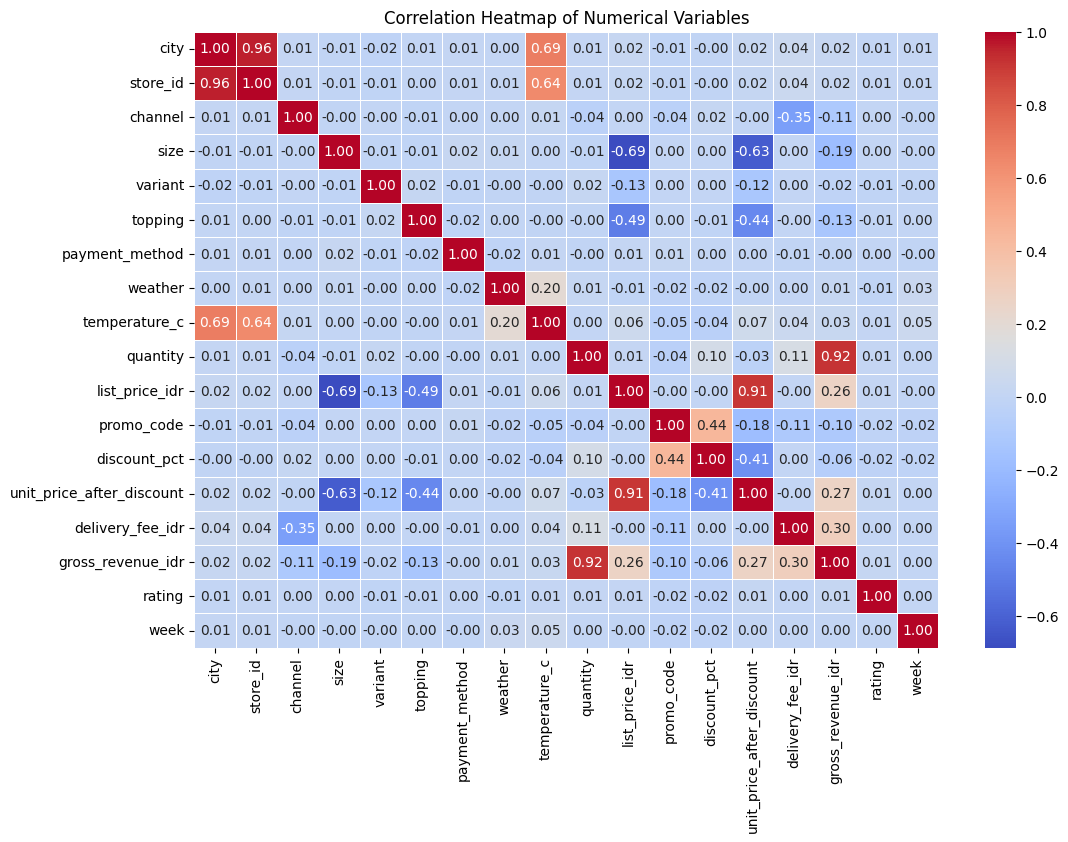

In [35]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Kecualikan kolom 'date' jika masih ada dan bertipe datetime, atau kolom ID
# yang tidak relevan untuk korelasi numerik
if 'date' in numerical_df.columns:
    numerical_df = numerical_df.drop(columns=['date'])

# Hitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Regression Plot

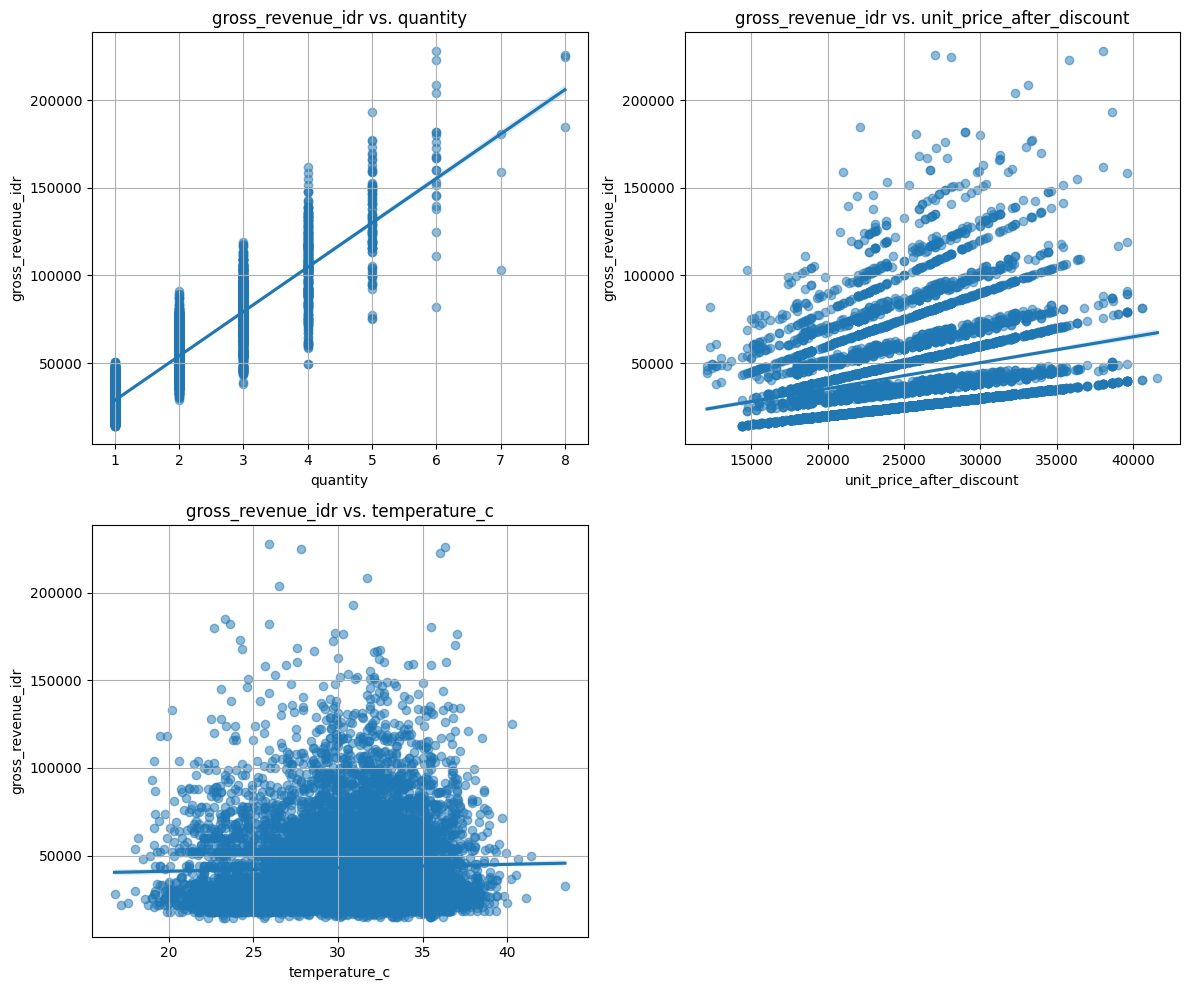

In [36]:
# Define the pairs of numerical variables for regression plots
regression_pairs = [
    ('quantity', 'gross_revenue_idr'),
    ('unit_price_after_discount', 'gross_revenue_idr'),
    ('temperature_c', 'gross_revenue_idr')
]

# Determine the number of rows and columns for the subplot grid
n_plots = len(regression_pairs)
n_cols = 2 # Misalnya 2 kolom per baris
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create a regression plot for each pair
for i, (x_var, y_var) in enumerate(regression_pairs):
    sns.regplot(data=df, x=x_var, y=y_var, ax=axes[i], scatter_kws={'alpha':0.5})
    axes[i].set_title(f'{y_var} vs. {x_var}')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Rekomendasi Bisnis

1. Fokus pada Peningkatan Penjualan di Kota Medan dan Denpasar

Referensi: Visualisasi Bar-Line Chart Total Pendapatan dan Jumlah Transaksi per Kota

Saran:

*   Lakukan studi pasar,
*   Analisis kompetitor,
*   Survei pelanggan di area tersebut,
*   Pertimbangkan strategi pemasaran yang lebih agresif,
*   Penyesuaian penawaran produk/promo,
*   Peningkatan visibilitas toko di kedua kota ini.

2. Optimalkan Strategi Promo Code, Khususnya di Hari Kerja

Referensi: Visualisasi Pie Chart Distribusi Promo Code dan analisis Promo Rate mingguan di Store Scorecard

Saran:

*   Pertimbangkan untuk lebih gencar menawarkan promo code pada hari kerja (Senin-Jumat) untuk meningkatkan volume transaksi dan pendapatan di luar puncak akhir pekan,
*    Analisis efektivitas setiap jenis promo (PAYDAY20, RAINY15, dll.) dari Store Scorecard dapat membantu mengidentifikasi promo mana yang paling mendorong penjualan atau AOV.

3. Evaluasi dan Tingkatkan Kinerja Toko dengan Pendapatan Rendah atau Variasi Kinerja Tinggi

Referensi: Visualisasi Bar Chart Distribusi Transaksi per Store ID dan Bar-Line Chart Total Pendapatan dan Jumlah Transaksi per Store ID

Saran:

*   Lakukan audit operasional dan pemasaran di toko-toko berkinerja rendah,
*   Identifikasi masalah seperti lokasi, manajemen staf, ketersediaan produk, atau aktivitas pemasaran lokal yang kurang efektif,
*   Untuk toko dengan volume transaksi tinggi tapi AOV rendah, pertimbangkan strategi upselling atau penawaran paket kombo.

4. Manfaatkan Data Cuaca dalam Strategi Penjualan dan Pemasaran

Referensi: Visualisasi FacetGrid Quantity vs Temperature by Weather Condition, FacetGrid Regression Plot Quantity vs Gross Revenue by Weather Condition, dan kolom Weather dalam Store Scorecard

Saran:

*   Gunakan data cuaca real-time atau perkiraan cuaca untuk menyesuaikan penawaran atau promosi. Misal: Penawaran diskon untuk transaksi Delivery saat cuaca hujan untuk mendorong pesanan online, atau promosikan varian yang lebih "menyegarkan" saat cuaca sangat panas.

5. Analisis Lebih Lanjut Pola Rating dan Hubungannya dengan Metrik Lain

Referensi: Visualisasi Box Plot Rating, FacetGrid Distribution of Rating by Payment Method, dan heatmap korelasi

Saran:

*   Lakukan analisis mendalam terhadap transaksi dengan rating sangat rendah (<4) dan rating sempurna (5)
*   Identifikasi faktor-faktor umum (varian, topping, channel, toko, waktu, promo) yang terkait dengan rating ekstrem ini




